<h2> 3.6 Featurizing text data with tfidf weighted word-vectors </h2>

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

In [118]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------

In [119]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [120]:
from sklearn.utils import shuffle
import math 
dfnlp = shuffle(dfnlp, random_state=42)

dfnlp_train = dfnlp[0:math.ceil(0.80*(df.shape[0]))]
dfnlp_test = dfnlp[(math.ceil(0.80*(df.shape[0]))):df.shape[0]]


In [121]:
dfppro = shuffle(dfppro, random_state=42)


dfppro_train = dfppro[0:math.ceil(0.80*(df.shape[0]))]
dfppro_test = dfppro[(math.ceil(0.80*(df.shape[0]))):df.shape[0]]


In [122]:
# split the dataset into train and test set after shuffling

import math


df = shuffle(df, random_state=42)

# split the dataset into train and test

df_train = df[0:math.ceil(0.80*(df.shape[0]))]

df_test = df[(math.ceil(0.80*(df.shape[0]))):df.shape[0]]



df_train['question1'] = df_train['question1'].apply(lambda x: str(x))
df_train['question2'] = df_train['question2'].apply(lambda x: str(x))


df_test['question1'] = df_test['question1'].apply(lambda x: str(x))
df_test['question2'] = df_test['question2'].apply(lambda x: str(x))

In [123]:
dfppro_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,2,2,34,34,8,8,7.0,16.0,0.437500,4,0
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,5,2,53,51,11,9,6.0,20.0,0.300000,7,3
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,1,1,96,45,16,8,2.0,24.0,0.083333,2,0
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,2,2,44,52,7,9,4.0,16.0,0.250000,4,0
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,4,31,38,29,9,7,3.0,16.0,0.187500,35,27


In [124]:
dfnlp_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,0.749981,0.749981,0.999975,0.999975,...,0.874989,0.0,1.0,0.0,8.0,90,81,88,88,0.800000
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,0.399992,0.399992,0.999975,0.666656,...,0.545450,0.0,1.0,2.0,10.0,73,73,73,73,0.326923
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,0.000000,0.000000,0.499988,0.249997,...,0.124999,0.0,0.0,8.0,12.0,41,39,39,44,0.108696
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,0.999975,0.999975,0.666644,0.399992,...,0.666659,0.0,1.0,2.0,8.0,96,89,72,68,0.288889
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,0.749981,0.599988,0.333322,0.249994,...,0.444440,0.0,1.0,2.0,8.0,81,71,68,62,0.366667


In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(df_train['question1']) + list(df_train['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

question1_tfidf = tfidf.transform(df_train['question1'])
question2_tfidf = tfidf.transform(df_train['question2'])

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))



question1_tfidf_test = tfidf.transform(df_test['question1'])
question2_tfidf_test = tfidf.transform(df_test['question2'])

In [137]:
question1_tfidf_test.shape

(80858, 98972)

In [138]:
question1_tfidf.shape

(323432, 98972)

In [139]:
from scipy.sparse import hstack

question_features_tfidf= hstack((question1_tfidf, question2_tfidf))
question_features_tfidf_test = hstack((question1_tfidf_test, question2_tfidf_test))

In [140]:
question_features_tfidf_test.shape

(80858, 197944)

- After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
- here we use a pre-trained GLOVE model which comes free with "Spacy".  https://spacy.io/usage/vectors-similarity
- It is trained on Wikipedia and therefore, it is stronger in terms of word semantics. 

In [141]:
df1_train = dfnlp_train.drop(['id','qid1','qid2','question1','question2','is_duplicate'],axis=1)
df1_test = dfnlp_test.drop(['id','qid1','qid2','question1','question2','is_duplicate'],axis=1)

In [142]:
df2_train = dfppro_train.drop(['id','qid1','qid2','question1','question2','is_duplicate'],axis=1)
df2_test = dfppro_test.drop(['id','qid1','qid2','question1','question2','is_duplicate'],axis=1)

In [143]:
print("Number of features in nlp dataframe :", df1_train.shape[1])
print("Number of features in preprocessed dataframe :", df2_train.shape[1])
print("Number of features in question1 w2v  dataframe :", question1_tfidf.shape[1])
print("Number of features in question2 w2v  dataframe :", question2_tfidf.shape[1])
print("Number of features in final dataframe  :", df1_train.shape[1]+df2_train.shape[1]+question1_tfidf.shape[1]+question2_tfidf.shape[1])

Number of features in nlp dataframe : 15
Number of features in preprocessed dataframe : 11
Number of features in question1 w2v  dataframe : 98972
Number of features in question2 w2v  dataframe : 98972
Number of features in final dataframe  : 197970


In [144]:
del question1_tfidf,question1_tfidf_test,question2_tfidf,question2_tfidf_test

In [145]:
# final features in train and test sets
tfidf_features_train = hstack((question_features_tfidf,df1_train,df2_train))
tfidf_features_test = hstack((question_features_tfidf_test,df1_test,df2_test))

In [146]:
tfidf_features_train = tfidf_features_train.tocsr()
tfidf_features_test = tfidf_features_test.tocsr()

In [148]:
y_test = dfnlp_test['is_duplicate']
y_train = dfnlp_train['is_duplicate']

X_train = tfidf_features_train
X_test = tfidf_features_test

In [149]:
print(X_test.shape)

(80858, 197970)


In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [154]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [155]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6309981696307106 Class 1:  0.36900183036928935
---------- Distribution of output variable in train data ----------
Class 0:  0.36998194365430753 Class 1:  0.36998194365430753


<h2> Random Model </h2>

Log loss on Test Data using Random Model 0.8841844551414406


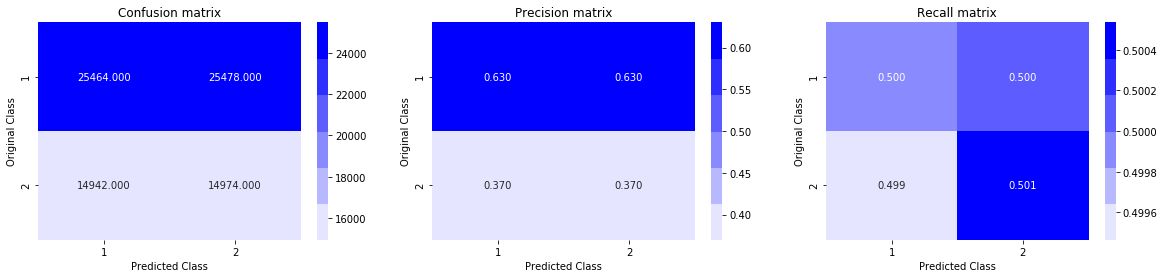

In [156]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
test_len = len(y_test)
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2>Logistic Regression </h2>

For values of alpha =  1e-05 The log loss is: 0.485077280985135
For values of alpha =  0.0001 The log loss is: 0.47985347171947945
For values of alpha =  0.001 The log loss is: 0.47453870685316213
For values of alpha =  0.01 The log loss is: 0.46557300167694415
For values of alpha =  0.1 The log loss is: 0.46698806572637674
For values of alpha =  1 The log loss is: 0.4950783211129927
For values of alpha =  10 The log loss is: 0.5473762777532921


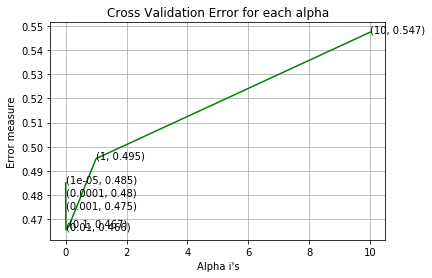

For values of best alpha =  0.01 The train log loss is: 0.4641414328019522
For values of best alpha =  0.01 The test log loss is: 0.46557300167694415
Total number of data points : 80858


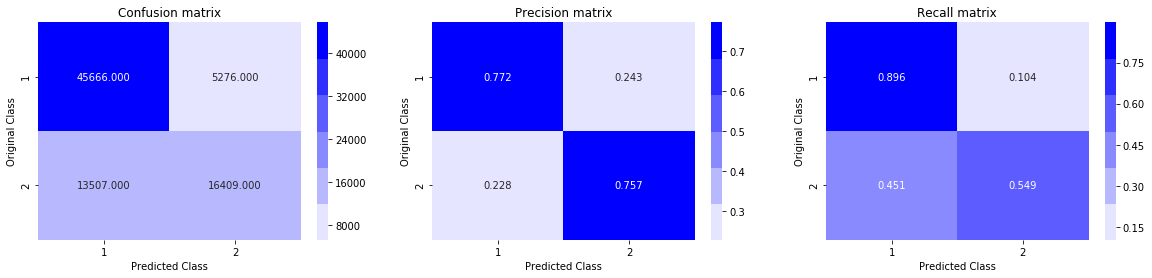

In [157]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2>Linear SVM with TFIDF </h2>

For values of alpha =  1e-05 The log loss is: 0.4583939704579279
For values of alpha =  0.0001 The log loss is: 0.47545291322132216
For values of alpha =  0.001 The log loss is: 0.507625736716709
For values of alpha =  0.01 The log loss is: 0.5208397731487039
For values of alpha =  0.1 The log loss is: 0.506146856572133
For values of alpha =  1 The log loss is: 0.5895302967410011
For values of alpha =  10 The log loss is: 0.6034962960972355


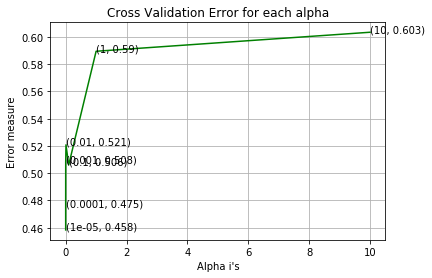

For values of best alpha =  1e-05 The train log loss is: 0.45750234733998535
For values of best alpha =  1e-05 The test log loss is: 0.4583939704579279
Total number of data points : 80858


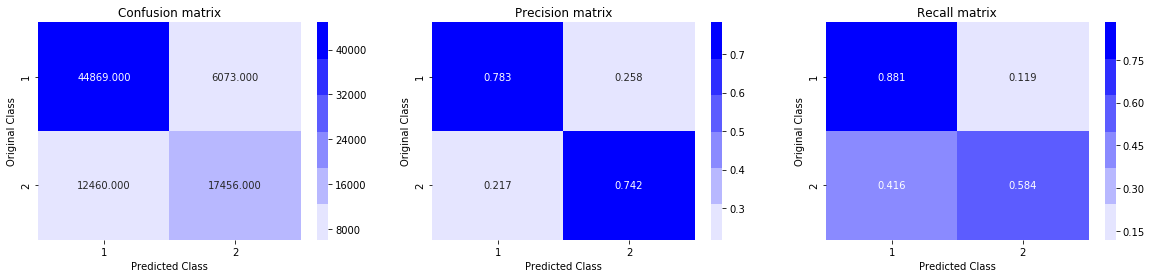

In [159]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> Conclusion </h2>

1. TFIDF vectorizer is used to obtain the features to find the duplicate questions between quora similarity pairs.
2. Total number of features used are: 197970
3. Whole dataset is used to split the samples into training and testing. 
4. 80% of the samples are used for training and the remaining samples are used for testing.
5. From the results below, it can be observed that TFIDF features worked better than TFIDF W2V while 
training logistic regression and linear svm modesl.

<h2> Results </h2>

In [164]:
# THE RESULTS ARE HARDCODED AS THE EXPERIMENTS ARE RUN ON DIFFERENT TIMES.
# PLEASE CONSIDER


from prettytable import PrettyTable
t = PrettyTable(['Vectorizer Name', 'Classifier Name','Log loss','Precision', 'Recall', 'F1-measure'])
t.add_row(['TFIDF', 'Random Model', "0.8841", "0.630","0.500","0.557"])
t.add_row(['TFIDF', 'Logistic Regression',"0.4655","0.772","0.896","0.829"])
t.add_row(['TFIDF', 'Linear SVM',"0.4583","0.783","0.881","0.829"])
print(t)

+-----------------+---------------------+----------+-----------+--------+------------+
| Vectorizer Name |   Classifier Name   | Log loss | Precision | Recall | F1-measure |
+-----------------+---------------------+----------+-----------+--------+------------+
|      TFIDF      |     Random Model    |  0.8841  |   0.630   | 0.500  |   0.557    |
|      TFIDF      | Logistic Regression |  0.4655  |   0.772   | 0.896  |   0.829    |
|      TFIDF      |      Linear SVM     |  0.4583  |   0.783   | 0.881  |   0.829    |
+-----------------+---------------------+----------+-----------+--------+------------+
